# Numerisk derivasjon

```{admonition} Læringsutbytte
:class: utbytte, dropdown
I dette temaet arbeider vi med kompetansemålet:

 * forstå begrepene vekstfart, grenseverdi, derivasjon og kontinuitet, og bruke disse for å løse praktiske problemer
 * bestemme den deriverte i et punkt geometrisk, algebraisk og ved numeriske metoder, og gi eksempler på funksjoner som ikke er deriverbare i gitte punkter

Etter å ha arbeidet med temaet, skal du:

 * beregne tilnærmede verdier for den deriverte fra definisjonen
 * definere funksjoner med programmering
 * bruke programmering til å tegne grafen til funksjonen og den deriverte
 * laste inn datasett i python
 * derivere datasett der vi ikke har en funksjon
```

Vi husker at vi definerte den deriverte som grenseverdien av den gjennomsnittlige vekstfarten.

$$f'(x)=\lim_{\Delta x\to 0}\frac{\Delta f(x)}{\Delta x}=\lim_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Den siste brøken her kalles **Newtons kvotient**. Når vi skal beregne den deriverte numerisk, så gjør vi en tilnærming der vi bruker Newtons koeffisient og setter $\Delta x$ lik et lite tall.

```{admonition} Numerisk derivasjon (framoverdifferansen)
:class: def

$f'(x)\approx\frac{f(x+\Delta x)-f(x)}{\Delta x}$

der $\Delta x$ settes til et lite tall (i størrelsesorden $10^{-8}$).

Denne metoden kalles framoverdifferansen siden vi ser på forskjellen mellom $f(x+\Delta x)$ og $f(x)$.
```

Framoverdifferansen er illustrert i bildet under. Når $\Delta x$ blir et lite tall vil den rette linja nærme seg tangenten i punktet $x$ og stigningstallet til linja vil nærme seg verdien til den deriverte i punktet.

```{figure} ./bilder/framoverdifferansen.png
---
scale: 50%
---
```

Tilsvarende kan vi bruke det vi kaller bakoverdifferansen der vi i stedet for å se på $x+\Delta x$ ser på $x-\Delta x$. I praksis er det ingen forskjell på disse.

```{admonition} Numerisk derivasjon (bakoverdifferansen)
:class: def, dropdown
Med bakoverdifferansen finner vi en tilnærming til den deriverte ved å se på et punkt før $x$-verdien vi er interessert i.
$f'(x)\approx\frac{f(x)-f(x-\Delta x)}{\Delta x}$
```

Disse metodene gir oss den deriverte i et punkt. Med programmering kan vi raskt gjennomføre metoden for mange $x$-verdier for å få tegnet opp grafen til den deriverte.

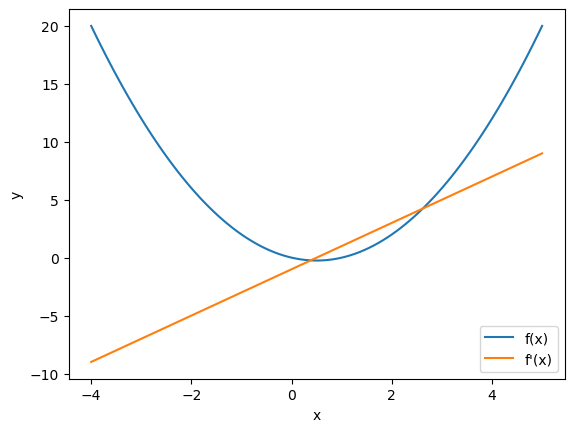

In [1]:
import numpy as np                      # Her kan vi bruk import pylab as *
import matplotlib.pyplot as plt         # i stedet for disse to bibliotekene

def f(x):                               # Definer funksjonen vi skal jobbe med
    return -x + x**2

def derivert(f, x, dx = 1E-8):          # Numerisk derivert av f. Her har dx fått en standardverdi
    return (f(x + dx) - f(x))/dx

x = np.linspace(-4,5,100)
y = f(x)
yderivert = derivert(f, x)

plt.plot(x,y,label="f(x)") # Plotter funksjonen
plt.plot(x,yderivert,label="f'(x)") # Plotter den deriverte til funksjonen
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Feilanalyse

Med de numeriske metodene gjør vi en tilnærming til den deriverte. Vi lar ikke $\Delta x$ gå mot null, men vi velger en liten verdi. Det er da naturlig å tenke seg at jo mindre vi velger $\Delta x$ jo mer nøyaktig blir verdien til den deriverte. Vi gjør en test på det.

In [15]:
def f(x):                 
    return -x + x**2

def adf(x):                       # Analytisk derivert av f
    return -1+2*x

def df(f, x, dx = 1E-8):          # Numerisk derivert av f
    return (f(x + dx) - f(x))/dx

x = 2
dx = [10**(-2), 10**(-4), 10**(-6), 10**(-8), 10**(-10), 10**(-12), 10**(-14), 10**(-16)]
analytisk = adf(x)

for i in range(len(dx)):
    numerisk = df(f, x, dx[i]) 
    feil = abs(numerisk-analytisk)/analytisk * 100
    print("For delta_x =", dx[i],"er feilen:", feil, "%")

For delta_x = 0.01 er feilen: 0.3333333333304248 %
For delta_x = 0.0001 er feilen: 0.003333333524106289 %
For delta_x = 1e-06 er feilen: 3.33502744827759e-05 %
For delta_x = 1e-08 er feilen: 6.07747097092215e-07 %
For delta_x = 1e-10 er feilen: 8.274037099909037e-06 %
For delta_x = 1e-12 er feilen: 0.008890058234101161 %
For delta_x = 1e-14 er feilen: 2.1405182655144017 %
For delta_x = 1e-16 er feilen: 100.0 %


Vi ser at feilen er minst for $\Delta x = 10^{-8}$. Grunnen til at det ikke hjelper å bruke mindre verdier er at datamaskinen sin evne til å lagre tall nøyaktig slår inn når $\Delta x$ blir veldig liten. Da dukker det opp avrundingsfeil som gir ganske voldsomme feil når vi opererer med så små tall.

## Sentraldifferansen (ekstra)
En metode som ofte gir et mer nøyaktig resultat er at vi slår sammen bakoverdifferansen og framoverdifferansen.

```{admonition} Sentraldifferansen
:class: def
Med sentraldifferansen ser vi på et punkt før og et punkt etter den $x$-verdien vi er interessert i.
$f'(x)\approx\frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}$
```

Her bruker vi altså et punkt før og et punkt etter det punktet vi er interessert i. Prøv å bruke figuren under til å forklare hvorfor det vil bli mer nøyaktig.

```{figure} ./bilder/sentraldifferansen.png
---
scale: 50%
---
```

Vi vil komme tilbake til numerisk derivasjon av reelle datasett når vi kommer til modeller.

## Kilder
Mye av stoffet på denne siden er basert på informasjon herfra: [realprog.no](https://realprog.no/docs/tema4_numeriske_metoder/derivasjon.html). Den siden går dypere inn i både forklaringer og begrunnelser for metodene.